In [1]:
import numpy as np

import scipy
from scipy.io import loadmat
from scipy.stats import multivariate_normal

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import NonUniformImage
from matplotlib import cm

# 1 Anomaly Detection

In [2]:
anomalyDataFile = 'ex8data1.mat'
anomalyData = loadmat(anomalyDataFile)
print(anomalyData.keys())
print(anomalyData['X'].shape)
print(anomalyData['Xval'].shape)
print(anomalyData['yval'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])
(307, 2)
(307, 2)
(307, 1)


<function matplotlib.pyplot.show>

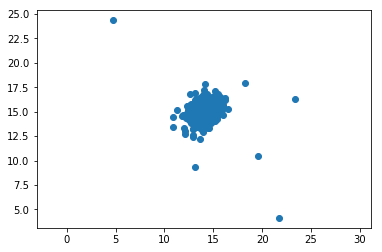

In [3]:
anomalyX = anomalyData['X']
plt.plot(anomalyX[:,:1], anomalyX[:,1:], 'o')
plt.axis('equal')
plt.show

## 1.1 Multivariate Gaussian Distribution
### 1.1.1 Univariate Gaussian Distribution
$p(x; \mu, \sigma ^2) = \frac{1}{\sqrt{2\pi}\cdot\sigma}exp\Big({-\frac{(x-\mu)^2}{2\sigma^2}}\Big)$, where<br />
$\sigma$ is variance.<br />

### 1.1.2 Multivariate Gaussian Distribution
$p(x; \mu, \Sigma) = \frac{1}{{(2\pi)^{n/2}}\cdot{|\Sigma|^{1/2}}}exp\Big(-\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu)^T\Big)$, where<br />
$\Sigma$ is a covariance matrix (size $k\times k$);<br />
$|\Sigma|$ is the determinant of a covariance matrix $\Sigma$<br />

In [4]:
def gaussianParameter(X):
    return np.mean(X, axis=0), np.cov(X.T)

def gaussianDistribution(X):
    mu, Sigma = np.mean(X, axis=0), np.cov(X.T)
    detSigma = np.linalg.det(Sigma)
    

(307, 2)
(2,)
(2, 2)


<function matplotlib.pyplot.show>

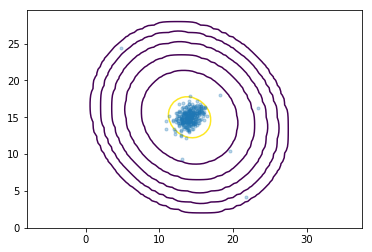

In [5]:
mu, Sigma = gaussianParameter(anomalyX)
print(anomalyX.shape)
print(mu.shape)
print(Sigma.shape)
def plotMultGaussian():
plt.plot(anomalyX[:,:1], anomalyX[:,1:], 'o', markersize=3, alpha=.3)
minX = 0,30
maxX = 0,30
XX, YY = np.mgrid[0:30:.5, 0:30:.5]
XY = np.empty(XX.shape + (2,))
XY[:, :, 0] = XX
XY[:, :, 1] = YY
ZZ = multivariate_normal(mu, Sigma)
plt.contour(XX, YY, ZZ.pdf(XY), [10**a for a in range(-22,0,4)])
plt.axis('equal')
plt.show

<function matplotlib.pyplot.show>

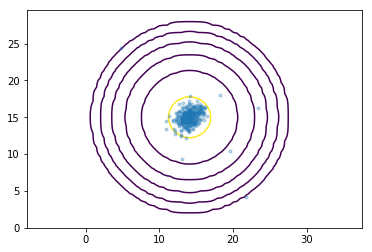

In [6]:
sigma = np.diag(np.var(anomalyX, axis=0))

plt.plot(anomalyX[:,:1], anomalyX[:,1:], 'o', markersize=3, alpha=.3)
minX = 0,30
maxX = 0,30
XX, YY = np.mgrid[0:30:.5, 0:30:.5]
XY = np.empty(XX.shape + (2,))
XY[:, :, 0] = XX
XY[:, :, 1] = YY
ZZ = multivariate_normal(mu, sigma)
plt.contour(XX, YY, ZZ.pdf(XY), [10**a for a in range(-22,0,4)])
plt.axis('equal')
plt.show